Question: https://datalemur.com/questions/r-squared-misuse

Solution: I found some good points and examples regarding R squared in below link. I will try to explain some of these these points by converting them in to python code

Reference: https://data.library.virginia.edu/is-r-squared-useless/

In case you found an issue, I request you to kindly raise a bug I will try to fix.


 #####  1.  R-squared does not measure goodness of fit. It can be arbitrarily low when the model is completely correct. By making σ2 large, we drive R-squared towards 0, even when every assumption of the simple linear regression model is correct in every particular.

In [58]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [9]:
x = np.linspace(1, 10, 100)
sd = 5
y = 2 + 1.2*x + np.random.normal(loc=0, scale=sd, size=100)

In [10]:
def gen_r2(sd):
    x = np.linspace(1, 10, 100) #predictor
    df_x = pd.DataFrame({'x': x})
    y = 2 + 1.2*x + np.random.normal(loc=0, scale=sd, size=100) #target=function of x + random noise
    reg = LinearRegression()
    reg.fit(df_x, y)
    y_hat = reg.predict(df_x)
    return r2_score(y, y_hat) #return r2 score

sigmas = np.linspace(0.5, 20, 20)
df = pd.DataFrame({'sigma':sigmas})
df['r2'] = df['sigma'].apply(lambda x: gen_r2(x))

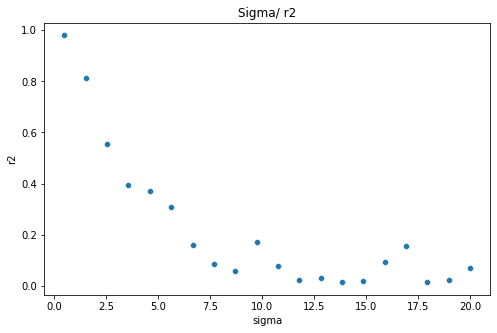

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['sigma'], y=df['r2'])
plt.title("Sigma/ r2")
plt.xlabel="sigma"
plt.ylabel="r2"
plt.show()

#### 2. R-squared can be arbitrarily close to 1 when the model is totally wrong. 

In [54]:
df.head(5)

,x,y
0,3.954825,7.236153
1,7.487827,49.959324
2,21.710491,440.608401
3,4.420302,10.310059
4,23.918005,473.200101


<AxesSubplot:xlabel='x', ylabel='y'>

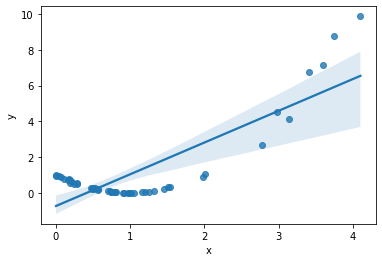

In [95]:
prng = np.random.RandomState(4)
x = prng.exponential(size=50)
y = ((x-1)**2) * prng.uniform(low=0.8, high=1.2, size=50)
df =  pd.DataFrame({'x':x, 'y':y})
sns.regplot(data=df, x='x', y='y')

In [96]:
reg = LinearRegression()
reg.fit(df[['x']], df['y'])
y_hat = reg.predict(df[['x']])
r2_score(y, y_hat)

0.6931989218086596